In [1]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os.path
import re
import math
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import numpy as np
from numpy import genfromtxt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_pacf
from stldecompose import decompose, forecast
from stldecompose.forecast_funcs import (naive,
                                         drift, 
                                         mean, 
                                         seasonal_naive)

In [2]:
DATASET = '/Dataset/1601'
DATASET_STATES = 'States_Timeseries.csv'
DATASET_ALL = 'All_Timeseries.csv'

SCALER_STANDARD = StandardScaler
SCALER_MINMAX = MinMaxScaler
DATA_SCALER = SCALER_MINMAX


In [3]:
def fetch_data():
    site_id_values = []
    site_ids = []
    dirname = os.path.abspath('')
    if os.path.isfile(dirname+DATASET+'.data') and os.path.isfile((dirname+DATASET+'.sites')):
        print("Loading Data...")
        with open(dirname+DATASET+'.data', 'r') as myfile:
            data = myfile.read().replace('\n', '').replace('\r','').replace(']','\n').replace('None',' \n').replace('[','')
            data = re.sub(' +', ' ', data)
            data = data.split('\n')
            data = [np.array(list(filter(None,row.split(' ')))).astype('float32').astype('int') for row in data[:-1]]
            site_id_values.extend(np.array(data))


        with open(dirname+DATASET+'.sites', "r") as f:
            for line in f:
                site_ids.append(str(line.strip()))
    return site_id_values, np.array(site_ids).astype(int)

In [4]:
def fetchStates():
    states = []
    dirname = os.path.abspath('')
    filename = dirname+DATASET+'.state_names'
    if os.path.isfile(filename):
        states = genfromtxt(filename, delimiter=',',dtype = str)
    return states

def createDF(names,ids,val):
    data_dict = {}
    for state in names:
        name = state[1]
        nr = state[0]
        idx = np.where(ids == int(nr))[0]
        if len(idx ==1):
            idx = idx[0]
            data = val[idx]
            data_dict[name] = data
    tidx = pd.date_range('2008-01-01', '2014-02-01', freq='M')
    df = pd.DataFrame(data_dict,tidx)
    return df

def normalize_df(df,scaler):
    x = df.values #returns a numpy array
    x_train = df.values[:-6]
    display(x_train.shape)
    scaler = scaler.fit(x_train)
    x_scaled = scaler.transform(x)
    df = pd.DataFrame(x_scaled, columns=df.columns, index=df.index)
    return df

def createDFall(ids,val):
    data_dict = {}
    tidx = pd.date_range('2008-01-01', '2014-02-01', freq='M')
    for mun_id,values in zip(ids,val):
        if(len(values) == len(tidx)):
            data_dict[mun_id] = values
    
    df = pd.DataFrame(data_dict,tidx)
    return df

In [5]:
val, ids = fetch_data()

Loading Data...


In [6]:
display(val[0])
display(ids[0])
display(len(val[0]))
display(len(ids))
display(len(val))
display(len(val[0])/12)

array([28, 25, 26, 25, 28, 26, 25, 27, 27, 22, 22, 20, 18, 25, 28, 22, 19,
       16, 18, 17, 16, 19, 18, 18, 19, 21, 23, 18, 17, 14, 13, 14,  9, 14,
       11, 11, 13, 17, 12, 12, 14, 13, 16, 15, 15, 15, 17, 14, 16, 14, 16,
       13, 11, 12, 13, 10, 13, 14, 11, 12, 13,  8, 11,  9, 10, 10, 10, 11,
       11, 12, 14, 13, 16])

10575727013

73

11372

11372

6.083333333333333

In [7]:
display(len(val))
display(len(ids))

11372

11372

In [8]:
states = fetchStates()

In [9]:
display(states)

array([['01', 'Schleswig-Holstein'],
       ['02', 'Freie und Hansestadt Hamburg'],
       ['03', 'Niedersachsen'],
       ['04', 'Freie Hansestadt Bremen'],
       ['05', 'Nordrhein-Westfalen'],
       ['06', 'Hessen'],
       ['07', 'Rheinland-Pfalz'],
       ['08', 'Baden-Württemberg'],
       ['09', 'Freistaat Bayern'],
       ['10', 'Saarland'],
       ['11', 'Berlin'],
       ['12', 'Brandenburg'],
       ['13', 'Mecklenburg-Vorpommern'],
       ['14', 'Freistaat Sachsen'],
       ['15', 'Sachsen-Anhalt'],
       ['16', 'Freistaat Thüringen']], dtype='<U28')

In [10]:
df = createDF(states,ids,val)

In [11]:
def human_format(num):
    num = float('{:.3g}'.format(num))
    magnitude = 0
    while abs(num) >= 100:
        magnitude += 1
        num /= 1000.0
    return '{}{}'.format('{:f}'.format(num).rstrip('0').rstrip('.'), ['', 'K', 'M', 'B', 'T'][magnitude])

In [12]:
display(df)
display(df.idxmin())
display(df.idxmax())

,Schleswig-Holstein,Freie und Hansestadt Hamburg,Niedersachsen,Freie Hansestadt Bremen,Nordrhein-Westfalen,Hessen,Rheinland-Pfalz,Baden-Württemberg,Freistaat Bayern,Saarland,Berlin,Brandenburg,Mecklenburg-Vorpommern,Freistaat Sachsen,Sachsen-Anhalt,Freistaat Thüringen
2008-01-31,119012,77211,343022,39592,807835,222593,131386,252774,348167,41284,252320,199074,145900,320354,200475,158298
2008-02-29,117828,76715,337940,39183,803067,220312,128760,247088,336044,40407,252290,198297,144158,318616,199439,157299
2008-03-31,114604,74748,324294,38823,788234,215260,123504,237868,314322,39702,248243,193494,138727,309734,193983,151896
2008-04-30,110964,74919,314732,38219,782440,211261,119506,233575,291785,38621,244804,187069,133245,298592,188594,145595
2008-05-31,106832,73512,303373,37257,767050,204421,114502,225605,270161,37179,238034,177806,125060,284503,181008,136976
2008-06-30,102402,71114,292691,35952,753506,200526,111871,216614,252643,36195,229013,169229,118241,268882,172010,128922
2008-07-31,104988,73221,303671,36822,768238,207231,116302,220749,251817,37236,230576,169916,117292,269529,172125,130332
2008-08-31,106476,73019,301172,36521,754398,199573,112523,229083,259761,36372,232391,170803,116459,268770,169780,128639
2008-09-30,101928,71335,285603,35209,731846,194385,108558,223125,255181,34664,224558,163261,111697,257589,159726,122234
2008-10-31,100123,70727,278773,35028,719590,191906,106847,215670,237054,34146,219355,157575,109171,248467,153655,118825


Schleswig-Holstein             2012-10-31
Freie und Hansestadt Hamburg   2011-11-30
Niedersachsen                  2011-11-30
Freie Hansestadt Bremen        2008-11-30
Nordrhein-Westfalen            2011-11-30
Hessen                         2011-11-30
Rheinland-Pfalz                2011-10-31
Baden-Württemberg              2011-11-30
Freistaat Bayern               2011-11-30
Saarland                       2011-11-30
Berlin                         2013-11-30
Brandenburg                    2013-10-31
Mecklenburg-Vorpommern         2013-09-30
Freistaat Sachsen              2013-10-31
Sachsen-Anhalt                 2013-10-31
Freistaat Thüringen            2013-10-31
dtype: datetime64[ns]

Schleswig-Holstein             2010-02-28
Freie und Hansestadt Hamburg   2010-02-28
Niedersachsen                  2008-01-31
Freie Hansestadt Bremen        2010-03-31
Nordrhein-Westfalen            2010-02-28
Hessen                         2009-04-30
Rheinland-Pfalz                2009-04-30
Baden-Württemberg              2010-01-31
Freistaat Bayern               2010-01-31
Saarland                       2008-01-31
Berlin                         2008-01-31
Brandenburg                    2008-01-31
Mecklenburg-Vorpommern         2008-01-31
Freistaat Sachsen              2008-01-31
Sachsen-Anhalt                 2008-01-31
Freistaat Thüringen            2008-01-31
dtype: datetime64[ns]

<IPython.core.display.Javascript object>


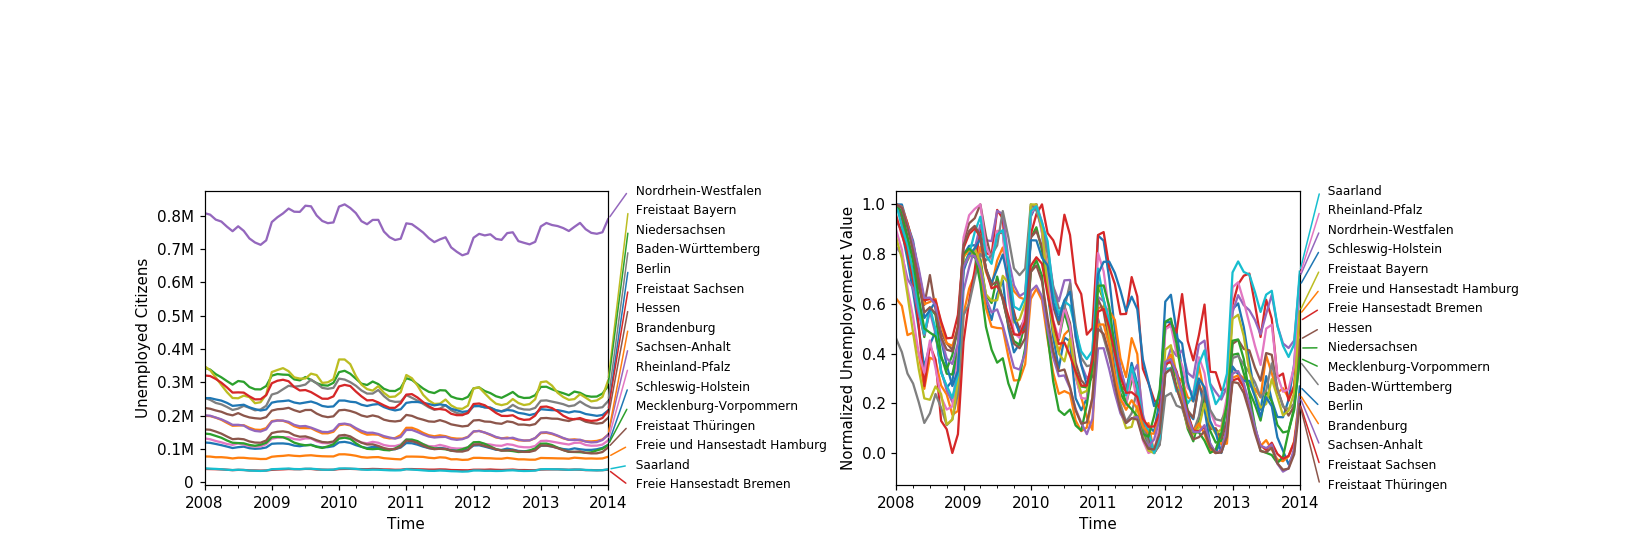

<class 'matplotlib.axes._subplots.AxesSubplot'>


(73, 16)

(16,)

(67, 16)

<class 'matplotlib.axes._subplots.AxesSubplot'>


(73, 16)

(16,)

In [13]:

fig, (ax, ax2) = plt.subplots(ncols=2, sharey=False)
fig.set_size_inches(15, 5, forward=True)
df.plot(ax = ax)
print(type(ax))
ax.get_legend().remove()
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: human_format(int(x))))
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.7, box.height*0.7])

ax.set(xlabel="Time", ylabel="Unemployed Citizens")
y = np.array(df.values)
display(y.shape)
x = np.array(df.index)
order = np.argsort(y[-1,:])
yp = y[-1,:]
display(yp.shape)
s = order

# Create annotation locations (I've used axes fraction coordinates)
# and am assuming they are evenly spaced
a_posx = np.tile([1.05], 16)
a_posy = np.linspace(0,1,16)
col = list(df.columns)
for i in s:
    ax.annotate('', [x[-1], yp[s[i]]], [a_posx[i], a_posy[i]],
                textcoords='axes fraction',
                arrowprops=dict(arrowstyle='-',color = ax.get_lines()[s[i]].get_color()), size=8)
    ax.annotate('  %s' % col[s[i]], [x[-1], yp[s[i]]], [a_posx[i], a_posy[i]],
                textcoords='axes fraction', va = "center", ha="left", size=8)

df2 = normalize_df(df,DATA_SCALER())
#df2.plot()
#df2 +=1
#df2  = df2.apply(np.log)
#for col in df2:
#    decomp = decompose(df2[col], period=12)
#    df2[col]= decomp.trend + decomp.resid
#    df2[col+'_t'] = decomp.trend
#    df2[col+'_s'] = decomp.seasonal
#    df2[col+'_r'] = decomp.resid
#df2.plot()
df2.plot(ax = ax2)
print(type(ax2))
ax2.get_legend().remove()
# Shrink current axis by 20%
box = ax2.get_position()
ax2.set_position([box.x0, box.y0, box.width * 0.7, box.height*0.7])
ax2.set(xlabel="Time", ylabel="Normalized Unemployement Value")

y = np.array(df2.values)
display(y.shape)
x = np.array(df2.index)
order = np.argsort(y[-1,:])
yp = y[-1,:]
display(yp.shape)
s = order

# Create annotation locations (I've used axes fraction coordinates)
# and am assuming they are evenly spaced
a_posx = np.tile([1.05], 16)
a_posy = np.linspace(0,1,16)
col = list(df2.columns)
for i in s:
    ax2.annotate('', [x[-1], yp[s[i]]], [a_posx[i], a_posy[i]],
                textcoords='axes fraction',
                arrowprops=dict(arrowstyle='-',color = ax2.get_lines()[s[i]].get_color()), size=8)
    ax2.annotate('  %s' % col[s[i]], [x[-1], yp[s[i]]], [a_posx[i], a_posy[i]],
                textcoords='axes fraction', va = "center", ha="left", size=8)
plt.show()


plt.savefig('states_and_norm.svg',bbox_inches='tight')

<IPython.core.display.Javascript object>


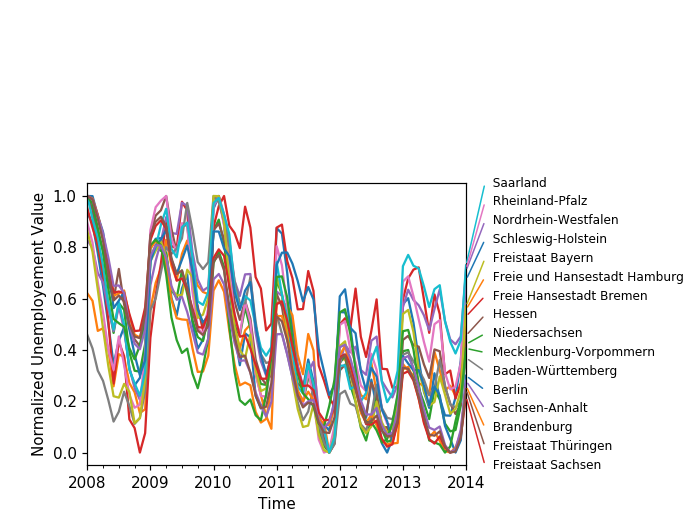

<class 'matplotlib.axes._subplots.AxesSubplot'>


(73, 16)

(16,)

In [27]:

df2 = normalize_df(df,DATA_SCALER())
#df2.plot()
#df2 +=1
#df2  = df2.apply(np.log)
#for col in df2:
#    decomp = decompose(df2[col], period=12)
#    df2[col]= decomp.trend + decomp.resid
#    df2[col+'_t'] = decomp.trend
#    df2[col+'_s'] = decomp.seasonal
#    df2[col+'_r'] = decomp.resid
#df2.plot()
ax = df2.plot()
print(type(ax))
ax.get_legend().remove()
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.7, box.height*0.7])
ax.set(xlabel="Time", ylabel="Normalized Unemployement Value")

y = np.array(df2.values)
display(y.shape)
x = np.array(df2.index)
order = np.argsort(y[-1,:])
yp = y[-1,:]
display(yp.shape)
s = order

# Create annotation locations (I've used axes fraction coordinates)
# and am assuming they are evenly spaced
a_posx = np.tile([1.05], 16)
a_posy = np.linspace(0,1,16)
col = list(df2.columns)
for i in s:
    ax.annotate('', [x[-1], yp[s[i]]], [a_posx[i], a_posy[i]],
                textcoords='axes fraction',
                arrowprops=dict(arrowstyle='-',color = ax.get_lines()[s[i]].get_color()), size=8)
    ax.annotate('  %s' % col[s[i]], [x[-1], yp[s[i]]], [a_posx[i], a_posy[i]],
                textcoords='axes fraction', va = "center", ha="left", size=8)
plt.show()



plt.savefig('states_norm.svg',bbox_inches='tight')

In [14]:
display(df2.var())

Schleswig-Holstein              0.065697
Freie und Hansestadt Hamburg    0.056690
Niedersachsen                   0.065571
Freie Hansestadt Bremen         0.062326
Nordrhein-Westfalen             0.055986
Hessen                          0.074396
Rheinland-Pfalz                 0.071696
Baden-Württemberg               0.070579
Freistaat Bayern                0.066833
Saarland                        0.064411
Berlin                          0.072227
Brandenburg                     0.072009
Mecklenburg-Vorpommern          0.069886
Freistaat Sachsen               0.081533
Sachsen-Anhalt                  0.074779
Freistaat Thüringen             0.088693
dtype: float64

In [15]:
display(df2.corr())

,Schleswig-Holstein,Freie und Hansestadt Hamburg,Niedersachsen,Freie Hansestadt Bremen,Nordrhein-Westfalen,Hessen,Rheinland-Pfalz,Baden-Württemberg,Freistaat Bayern,Saarland,Berlin,Brandenburg,Mecklenburg-Vorpommern,Freistaat Sachsen,Sachsen-Anhalt,Freistaat Thüringen
Schleswig-Holstein,1.000000,0.833562,0.919376,0.680741,0.781280,0.853378,0.907779,0.667321,0.922157,0.800361,0.823620,0.835570,0.902284,0.837683,0.826589,0.843461
Freie und Hansestadt Hamburg,0.833562,1.000000,0.835053,0.766249,0.902893,0.847113,0.875486,0.876705,0.881783,0.821816,0.798135,0.641783,0.618480,0.730457,0.674314,0.736436
Niedersachsen,0.919376,0.835053,1.000000,0.678178,0.825833,0.963050,0.869832,0.723979,0.902831,0.838823,0.885499,0.911299,0.873565,0.949283,0.926924,0.948208
Freie Hansestadt Bremen,0.680741,0.766249,0.678178,1.000000,0.791905,0.655429,0.759146,0.729475,0.722727,0.754273,0.719994,0.430955,0.437567,0.529403,0.479736,0.508912
Nordrhein-Westfalen,0.781280,0.902893,0.825833,0.791905,1.000000,0.877800,0.927401,0.871758,0.890289,0.957641,0.665613,0.603092,0.558183,0.676183,0.664457,0.708020
Hessen,0.853378,0.847113,0.963050,0.655429,0.877800,1.000000,0.886662,0.749983,0.872511,0.880696,0.839484,0.882323,0.793618,0.923404,0.910206,0.941110
Rheinland-Pfalz,0.907779,0.875486,0.869832,0.759146,0.927401,0.886662,1.000000,0.805796,0.945829,0.929097,0.708096,0.703093,0.725700,0.737933,0.733635,0.775311
Baden-Württemberg,0.667321,0.876705,0.723979,0.729475,0.871758,0.749983,0.805796,1.000000,0.858135,0.797449,0.613092,0.445016,0.417203,0.607887,0.511475,0.604370
Freistaat Bayern,0.922157,0.881783,0.902831,0.722727,0.890289,0.872511,0.945829,0.858135,1.000000,0.896925,0.745293,0.732617,0.774455,0.792427,0.763585,0.808960
Saarland,0.800361,0.821816,0.838823,0.754273,0.957641,0.880696,0.929097,0.797449,0.896925,1.000000,0.630750,0.640638,0.617521,0.682810,0.688261,0.718944


<IPython.core.display.Javascript object>


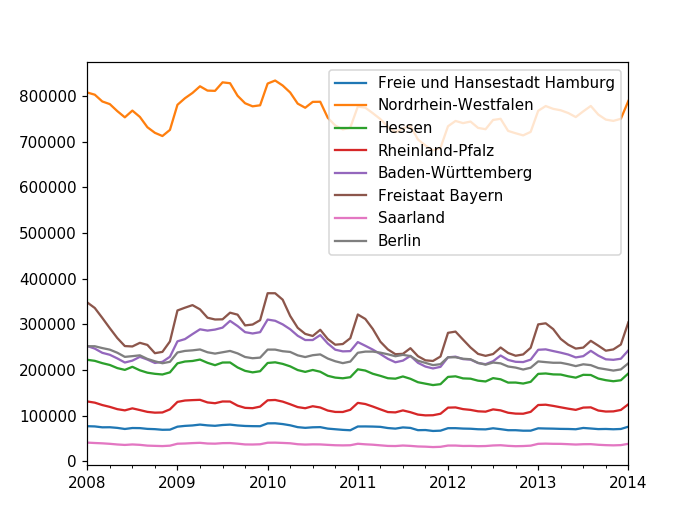

In [16]:
arima_favourites = ['Freie und Hansestadt Hamburg','Nordrhein-Westfalen','Hessen','Rheinland-Pfalz','Baden-Württemberg','Freistaat Bayern','Saarland','Berlin']
df[arima_favourites].plot()


<IPython.core.display.Javascript object>


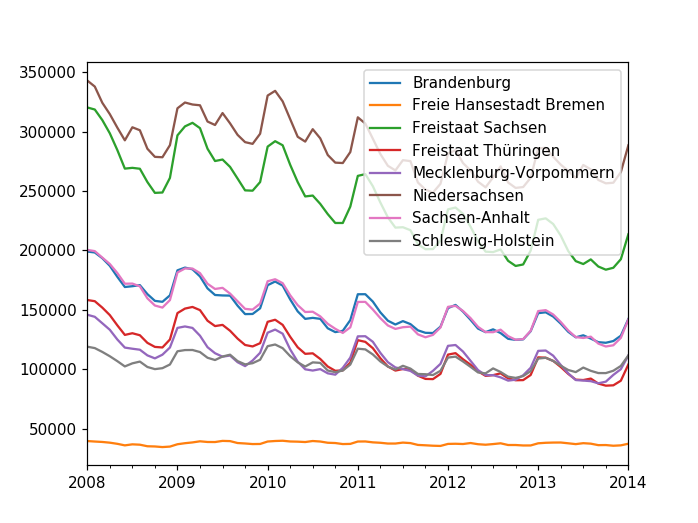

In [18]:
df[df.columns.difference(arima_favourites)].plot()

In [17]:
df.to_csv(DATASET_STATES,encoding = "utf-8")

'Schleswig-Holstein'

<IPython.core.display.Javascript object>


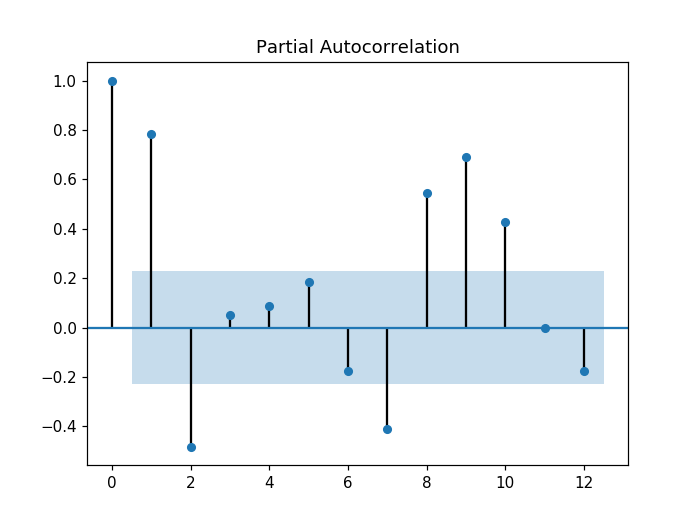

'Freie und Hansestadt Hamburg'

<IPython.core.display.Javascript object>


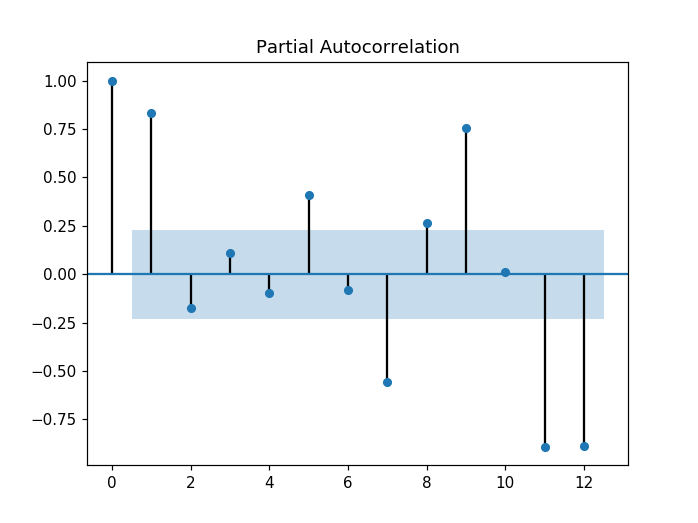

'Niedersachsen'

<IPython.core.display.Javascript object>


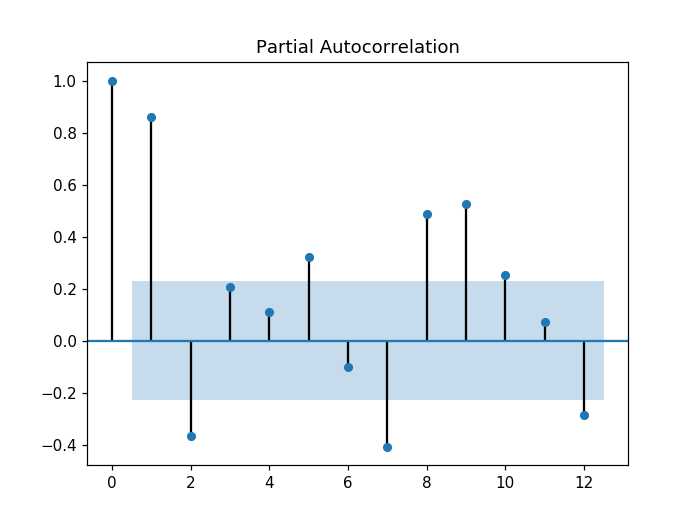

'Freie Hansestadt Bremen'

<IPython.core.display.Javascript object>


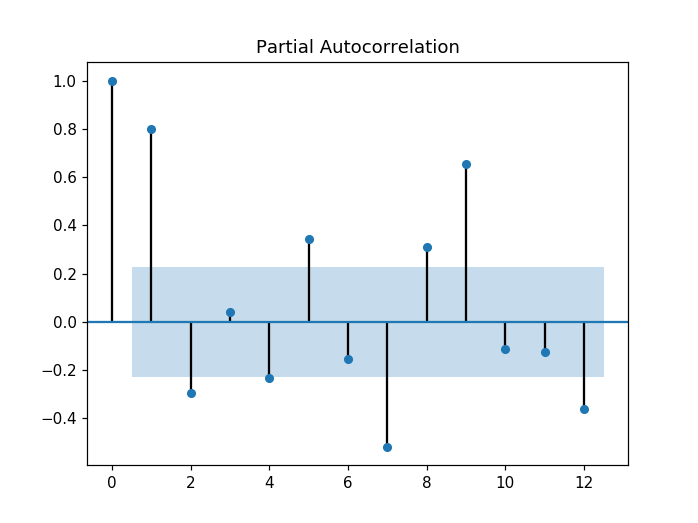

'Nordrhein-Westfalen'

<IPython.core.display.Javascript object>


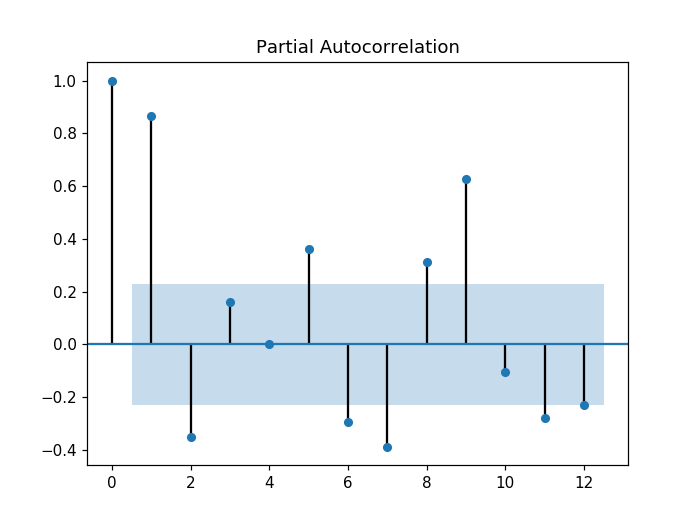

'Hessen'

<IPython.core.display.Javascript object>


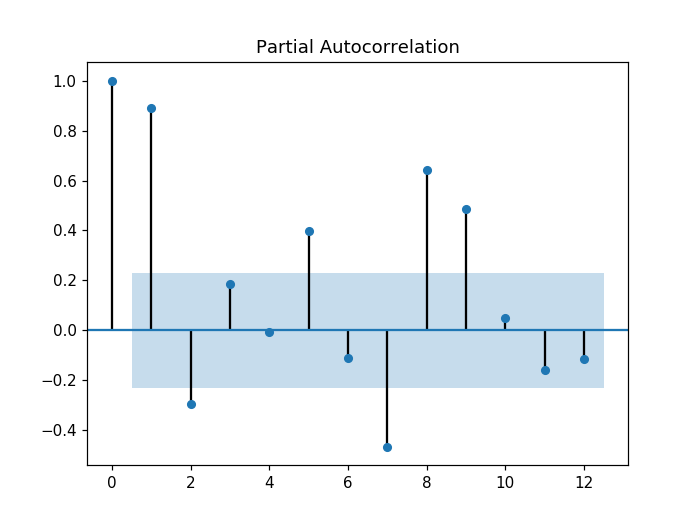

'Rheinland-Pfalz'

<IPython.core.display.Javascript object>


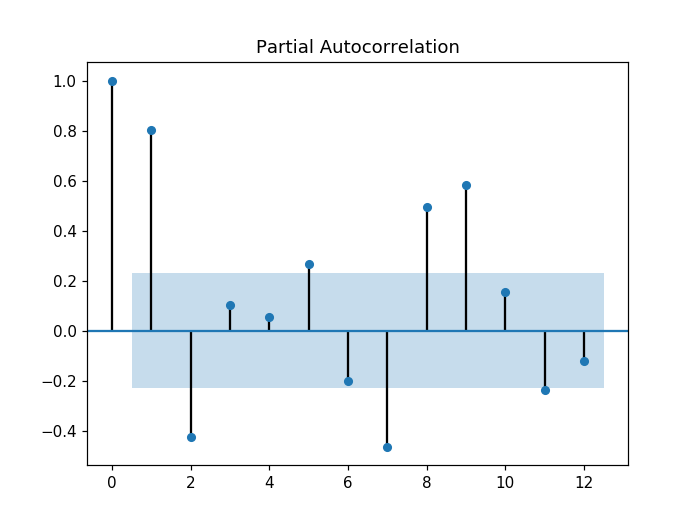

'Baden-Württemberg'

<IPython.core.display.Javascript object>


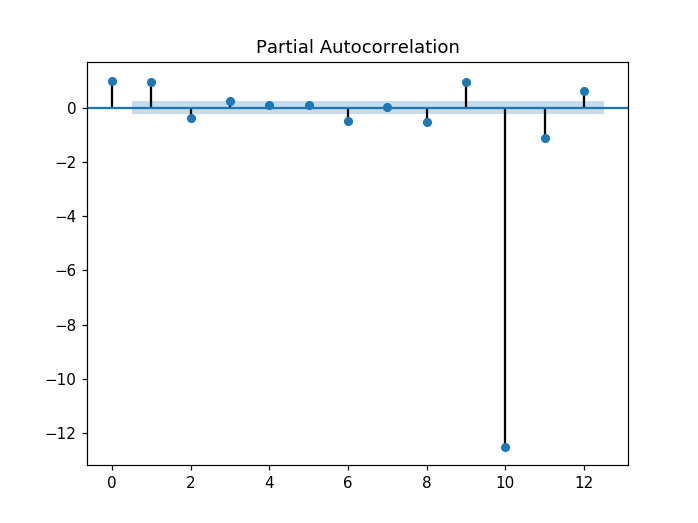

/home/jonas/anaconda3/envs/myGuidedResEnv/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


'Freistaat Bayern'

<IPython.core.display.Javascript object>


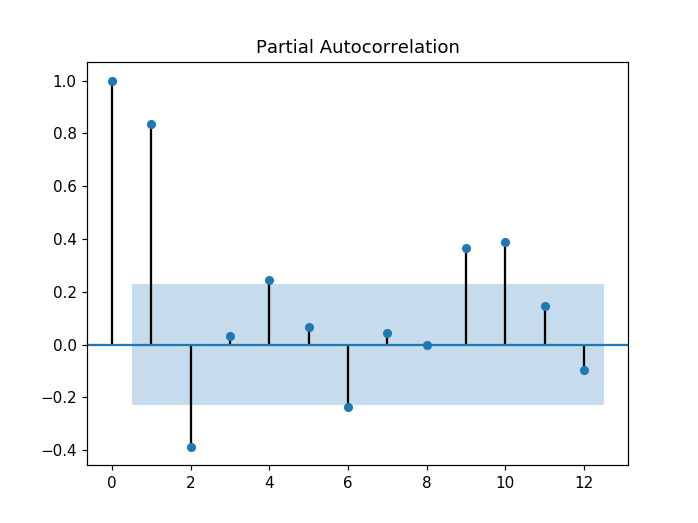

'Saarland'

<IPython.core.display.Javascript object>


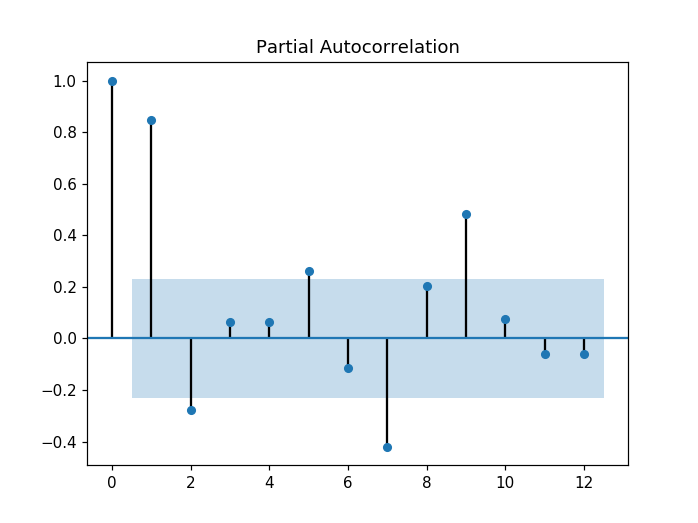

'Berlin'

<IPython.core.display.Javascript object>


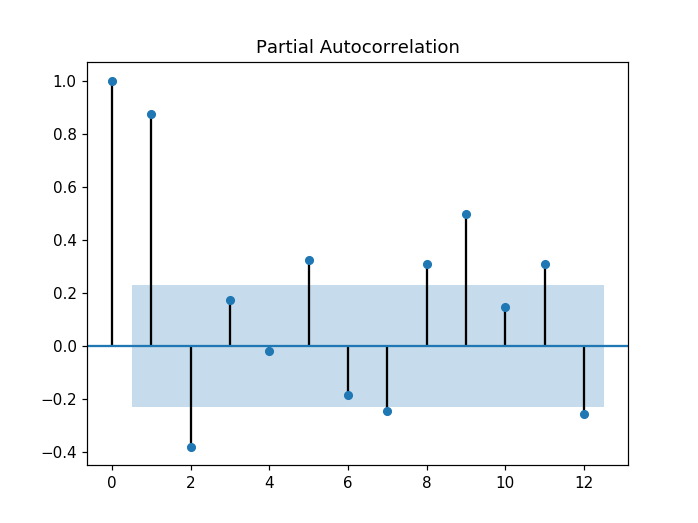

'Brandenburg'

<IPython.core.display.Javascript object>


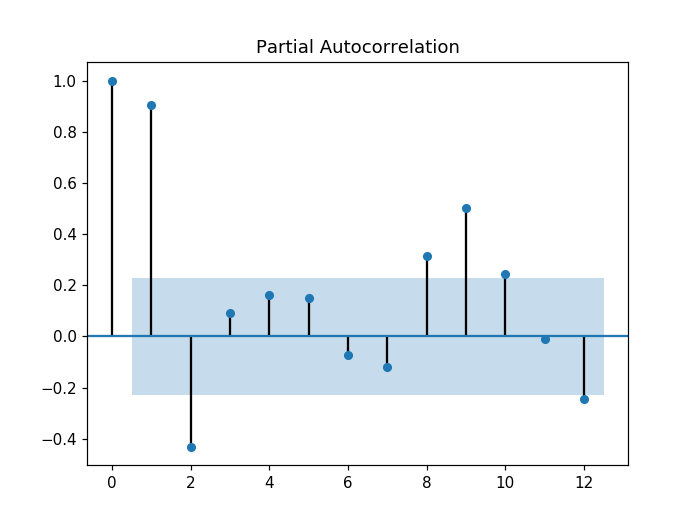

'Mecklenburg-Vorpommern'

<IPython.core.display.Javascript object>


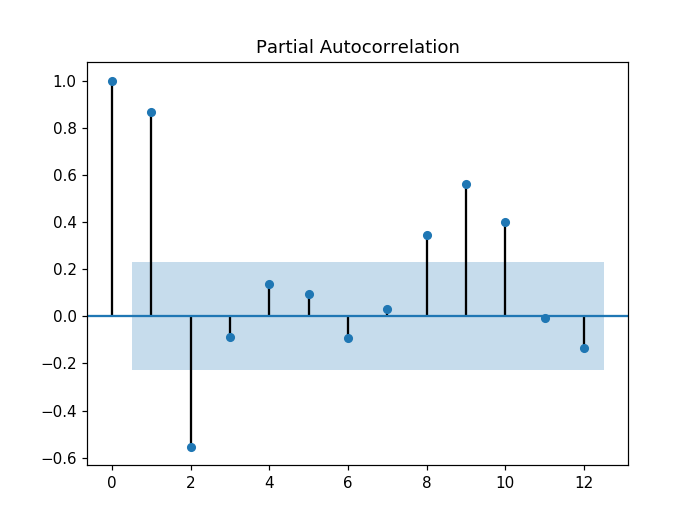

'Freistaat Sachsen'

<IPython.core.display.Javascript object>


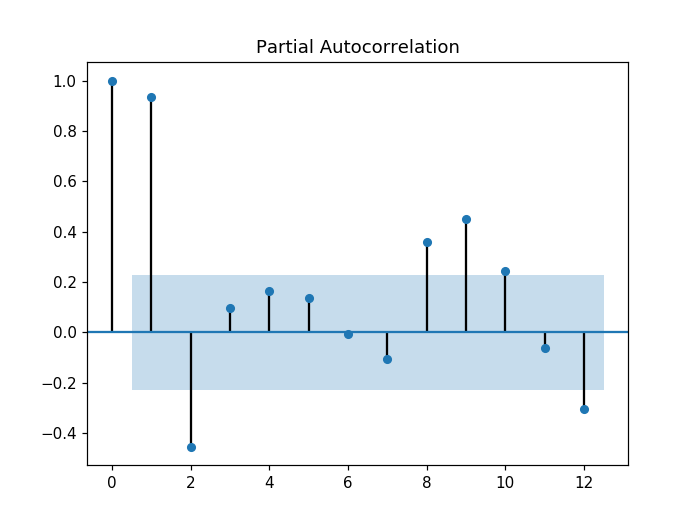

'Sachsen-Anhalt'

<IPython.core.display.Javascript object>


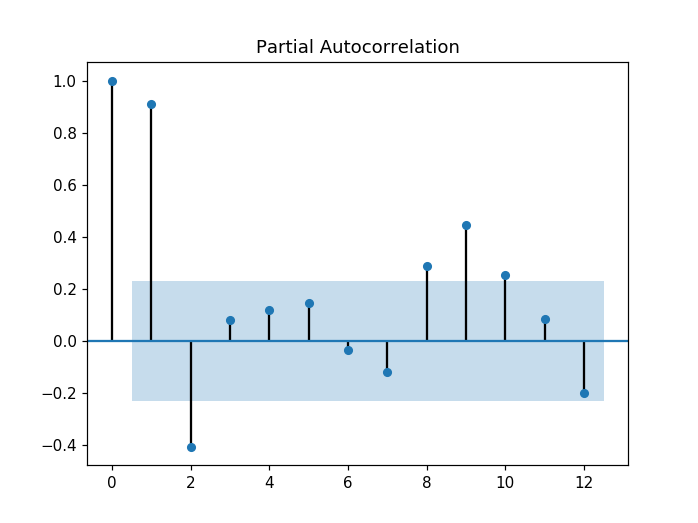

'Freistaat Thüringen'

<IPython.core.display.Javascript object>


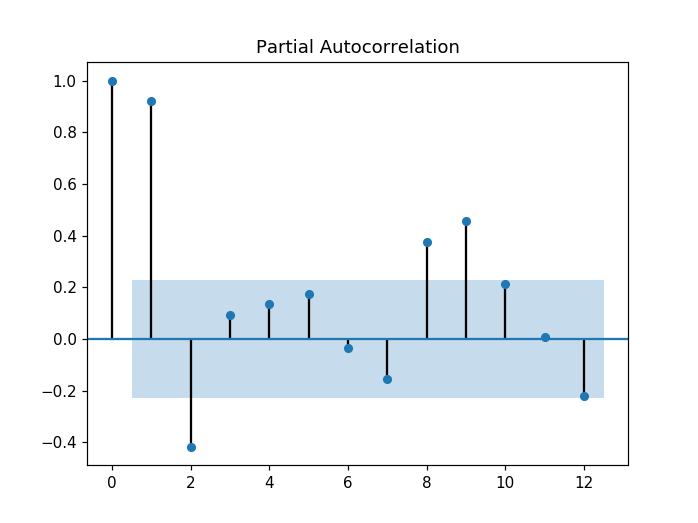

In [18]:
for col in df:
    display(col)
    plot_pacf(df[col], lags=12)
    plt.show()

In [13]:
df_all = createDFall(ids,val)

In [14]:
display(df_all)

,10575727013,10595912131,71335001032,71335003043,71335006099,71335001106,71345001036,71345003059,71345002061,71385005059,...,146280380380,147300070070,16062,16064,160640072072,160675001025,160685010001,160700056056,160765004043,160760089089
2008-01-31,28,24,54,56,20,27,38,11,14,65,...,408,2724,7238,8720,174,117,43,249,38,201
2008-02-29,25,24,48,54,19,23,42,11,10,62,...,393,2683,7310,8861,184,124,39,248,37,210
2008-03-31,26,22,43,55,17,22,40,9,12,61,...,357,2638,7221,8574,179,142,35,235,34,208
2008-04-30,25,24,41,53,17,20,40,9,12,59,...,341,2585,6933,8269,183,141,34,229,27,197
2008-05-31,28,24,42,46,13,16,37,8,10,57,...,320,2501,6493,7519,172,125,36,219,24,170
2008-06-30,26,22,41,40,12,16,38,6,11,57,...,280,2310,6173,6934,156,117,32,205,20,156
2008-07-31,25,26,44,39,13,18,45,6,10,52,...,294,2382,6250,7017,153,117,30,208,22,158
2008-08-31,27,29,43,40,12,15,45,5,10,47,...,270,2303,6246,6605,138,102,30,209,24,157
2008-09-30,27,29,41,33,11,18,44,6,10,49,...,259,2134,5942,6497,138,105,28,203,16,153
2008-10-31,22,28,44,29,11,19,34,5,12,44,...,266,2119,5780,6349,142,94,28,197,21,140


In [15]:
df_all.to_csv(DATASET_ALL,encoding = "utf-8")